In [181]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [182]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [183]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [184]:
sutunisimler=["id","tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [138]:
train.head()

,tarih,urun,besin,kategori,fiyat,uretimyeri,market,sehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [139]:
test.head()

,id,tarih,urun,besin,kategori,uretimyeri,market,sehir
0,0,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,1,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,2,2021-01-01,hindi,160,et,Yurt içi,M,A
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   tarih       227520 non-null  object 
 1   urun        227520 non-null  object 
 2   besin       227520 non-null  int64  
 3   kategori    227520 non-null  object 
 4   fiyat       227520 non-null  float64
 5   uretimyeri  227520 non-null  object 
 6   market      227520 non-null  object 
 7   sehir       227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [141]:
train.shape

(227520, 8)

In [142]:
len(train)

227520

In [143]:
len(train.urun.unique())

79

In [144]:
train.tarih.unique()

array(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
       '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
       '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
       '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
       '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
       '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
      dtype=object)

In [145]:
train.urun.unique()

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [146]:
train.urun.value_counts()

kıyma            2880
salam            2880
Çilek            2880
Armut            2880
tereyağ          2880
                 ... 
Nohut            2880
Mercimek-kuru    2880
Marul            2880
Mantar           2880
ceviz            2880
Name: urun, Length: 79, dtype: int64

In [147]:
train.besin.unique()

array([120, 103, 160, 354,  72,  42, 346,  47,  25,  63, 333,  35,   8,
        19,  38,  24,  16,  15, 351, 376,  83,  27,  52,  32, 247, 350,
       390, 353, 368, 329, 402, 100, 150, 170, 200,  90, 125, 250, 400,
       375,  57,  39,  60,  80,  93,  28,  54,  79,  17,  36,  77,  41,
        49,  74, 110, 115], dtype=int64)

In [148]:
train.besin.nunique()

56

In [149]:
train.besin.value_counts()

42     11520
25     11520
120     8640
353     8640
24      8640
390     8640
57      5760
52      5760
350     5760
351     5760
47      5760
125     5760
90      5760
100     5760
110     5760
39      2880
400     2880
375     2880
250     2880
93      2880
60      2880
80      2880
170     2880
28      2880
54      2880
79      2880
17      2880
36      2880
77      2880
41      2880
49      2880
74      2880
200     2880
368     2880
150     2880
402     2880
160     2880
354     2880
72      2880
346     2880
63      2880
333     2880
35      2880
8       2880
19      2880
38      2880
16      2880
15      2880
376     2880
83      2880
27      2880
32      2880
247     2880
103     2880
329     2880
115     2880
Name: besin, dtype: int64

In [150]:
train.kategori.unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [151]:
train.kategori.nunique()

6

In [152]:
train.kategori.unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [153]:
train.uretimyeri.unique()

array(['Yurt içi', 'Yurt dışı'], dtype=object)

In [154]:
train.uretimyeri.value_counts()

Yurt içi     113760
Yurt dışı    113760
Name: uretimyeri, dtype: int64

In [155]:
train.market.unique()

array(['M', 'C', 'B'], dtype=object)

In [156]:
train.market.value_counts()

M    75840
C    75840
B    75840
Name: market, dtype: int64

In [157]:
train.sehir.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [158]:
train.sehir.value_counts()

A    28440
B    28440
C    28440
D    28440
E    28440
F    28440
G    28440
H    28440
Name: sehir, dtype: int64

In [159]:
train.describe()

,besin,fiyat
count,227520.000000,227520.000000
mean,143.113924,16.348622
std,133.218871,13.260935
min,8.000000,0.730000
25%,41.000000,7.330000
50%,83.000000,12.600000
75%,250.000000,20.900000
max,402.000000,141.330000


In [160]:
train.corr()["fiyat"]

besin    0.017858
fiyat    1.000000
Name: fiyat, dtype: float64

In [161]:
train.isnull().sum()

tarih         0
urun          0
besin         0
kategori      0
fiyat         0
uretimyeri    0
market        0
sehir         0
dtype: int64

In [162]:
kiyma2=train.urun.isin(["kıyma"])
kiyma2=train[kiyma2]

In [163]:
kiyma2.head(-5)

,tarih,urun,besin,kategori,fiyat,uretimyeri,market,sehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
79,2016-01-01,kıyma,120,et,33.71,Yurt dışı,M,A
158,2016-01-01,kıyma,120,et,33.95,Yurt içi,C,A
237,2016-01-01,kıyma,120,et,32.88,Yurt dışı,C,A
316,2016-01-01,kıyma,120,et,33.53,Yurt içi,B,A
...,...,...,...,...,...,...,...,...
226730,2020-12-01,kıyma,120,et,112.47,Yurt içi,C,G
226809,2020-12-01,kıyma,120,et,117.16,Yurt dışı,C,G
226888,2020-12-01,kıyma,120,et,104.47,Yurt içi,B,G
226967,2020-12-01,kıyma,120,et,115.13,Yurt dışı,B,G


In [164]:
kiyma2.besin.unique()

array([120], dtype=int64)

In [165]:
from datetime import datetime, date 
train['tarih'] = pd.to_datetime(train['tarih'], format = '%Y-%m-%d')
train.head().style.set_properties(subset=['tarih'], **{'background-color': 'dodgerblue'})
deneme=train.groupby(['tarih'])['fiyat'].transform('mean')

(16801.0, 18597.0)

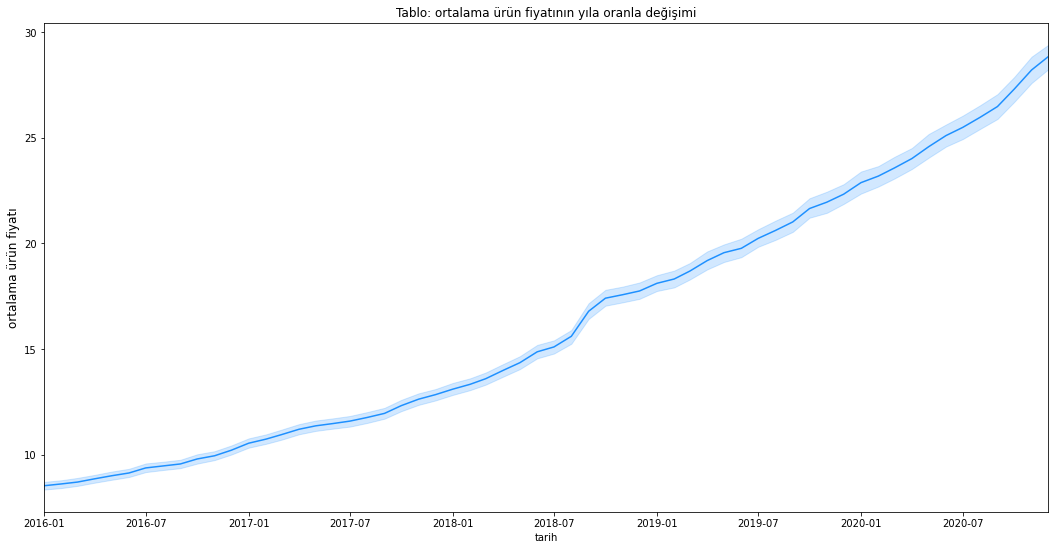

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,9))
sns.lineplot(x=train['tarih'], y=train['fiyat'].fillna(method='ffill'), color='dodgerblue')
ax.set_title('Tablo: {}'.format('ortalama ürün fiyatının yıla oranla değişimi'), fontsize=12)
ax.set_ylabel(ylabel='ortalama ürün fiyatı', fontsize=12)          
ax.set_xlim([date(2016, 1, 1), date(2020, 12, 1)])

# DERİN ÖĞRENME DENEMESİ

In [185]:
tarih2016=train.iloc[:45503,:]
tarih2017=train.iloc[45504:91008,:]
tarih2018=train.iloc[91008:136512,:]
tarih2019=train.iloc[136512:182016,:]
tarih2020=train.iloc[182016:,:]

In [186]:
one_hot = pd.get_dummies(test[['tarih','urun','kategori','uretimyeri','market','sehir']])
test = test.drop(['id','tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

test = test.join(one_hot)
test.rename(columns={'tarih_2021-01-01': 'ocak', 'tarih_2021-02-01': 'subat', 'tarih_2021-03-01': 'mart'
                        , 'tarih_2021-04-01': 'nisan', 'tarih_2021-05-01': 'mayis', 'tarih_2021-06-01': 'haziran'
                        , 'tarih_2021-07-01': 'temmuz', 'tarih_2021-08-01': 'agustos', 'tarih_2021-09-01': 'eylul'
                        , 'tarih_2021-10-01': 'ekim', 'tarih_2021-11-01': 'kasim', 'tarih_2021-12-01': 'aralik'}, inplace=True)

In [187]:
one_hot = pd.get_dummies(tarih2016[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2016 = tarih2016.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2016 = tarih2016.join(one_hot)
tarih2016.rename(columns={'tarih_2016-01-01': 'ocak', 'tarih_2016-02-01': 'subat', 'tarih_2016-03-01': 'mart'
                         , 'tarih_2016-04-01': 'nisan', 'tarih_2016-05-01': 'mayis', 'tarih_2016-06-01': 'haziran'
                         , 'tarih_2016-07-01': 'temmuz', 'tarih_2016-08-01': 'agustos', 'tarih_2016-09-01': 'eylul'
                         , 'tarih_2016-10-01': 'ekim', 'tarih_2016-11-01': 'kasim', 'tarih_2016-12-01': 'aralik'}, inplace=True)

In [188]:
one_hot = pd.get_dummies(tarih2017[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2017 = tarih2017.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2017 = tarih2017.join(one_hot)
tarih2017.rename(columns={'tarih_2017-01-01': 'ocak', 'tarih_2017-02-01': 'subat', 'tarih_2017-03-01': 'mart'
                         , 'tarih_2017-04-01': 'nisan', 'tarih_2017-05-01': 'mayis', 'tarih_2017-06-01': 'haziran'
                         , 'tarih_2017-07-01': 'temmuz', 'tarih_2017-08-01': 'agustos', 'tarih_2017-09-01': 'eylul'
                         , 'tarih_2017-10-01': 'ekim', 'tarih_2017-11-01': 'kasim', 'tarih_2017-12-01': 'aralik'}, inplace=True)

In [189]:
one_hot = pd.get_dummies(tarih2018[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2018 = tarih2018.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2018 = tarih2018.join(one_hot)
tarih2018.rename(columns={'tarih_2018-01-01': 'ocak', 'tarih_2018-02-01': 'subat', 'tarih_2018-03-01': 'mart'
                         , 'tarih_2018-04-01': 'nisan', 'tarih_2018-05-01': 'mayis', 'tarih_2018-06-01': 'haziran'
                         , 'tarih_2018-07-01': 'temmuz', 'tarih_2018-08-01': 'agustos', 'tarih_2018-09-01': 'eylul'
                         , 'tarih_2018-10-01': 'ekim', 'tarih_2018-11-01': 'kasim', 'tarih_2018-12-01': 'aralik'}, inplace=True)

In [190]:
one_hot = pd.get_dummies(tarih2019[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2019 = tarih2019.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2019 = tarih2019.join(one_hot)
tarih2019.rename(columns={'tarih_2019-01-01': 'ocak', 'tarih_2019-02-01': 'subat', 'tarih_2019-03-01': 'mart'
                         , 'tarih_2019-04-01': 'nisan', 'tarih_2019-05-01': 'mayis', 'tarih_2019-06-01': 'haziran'
                         , 'tarih_2019-07-01': 'temmuz', 'tarih_2019-08-01': 'agustos', 'tarih_2019-09-01': 'eylul'
                         , 'tarih_2019-10-01': 'ekim', 'tarih_2019-11-01': 'kasim', 'tarih_2019-12-01': 'aralik'}, inplace=True)

In [191]:
one_hot = pd.get_dummies(tarih2020[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2020 = tarih2020.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2020 = tarih2020.join(one_hot)
tarih2020.rename(columns={'tarih_2020-01-01': 'ocak', 'tarih_2020-02-01': 'subat', 'tarih_2020-03-01': 'mart'
                         , 'tarih_2020-04-01': 'nisan', 'tarih_2020-05-01': 'mayis', 'tarih_2020-06-01': 'haziran'
                         , 'tarih_2020-07-01': 'temmuz', 'tarih_2020-08-01': 'agustos', 'tarih_2020-09-01': 'eylul'
                         , 'tarih_2020-10-01': 'ekim', 'tarih_2020-11-01': 'kasim', 'tarih_2020-12-01': 'aralik'}, inplace=True)

In [192]:
test

,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [196]:
tarih2016

,fiyat,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,...,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,kasim,aralik
0,33.41,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.12,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.02,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.14,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45498,4.78,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
45499,16.84,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
45500,17.63,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
45501,19.12,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [194]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=61
for ay in aylar:
    frame="demo"+str(ay)
    frame=test[test[ay]==1].iloc[:,0:1]
    frame[str(ay)]=i
    test.drop(ay,axis=1,inplace=True)
    test=pd.concat([test,frame],axis=1)
    i+=1
test=test.fillna(0)

'''aylartest=test.iloc[:,92:]
test.drop(aylar,axis=1,inplace=True)
test=pd.concat([aylartest,test],axis=1)'''

'aylartest=test.iloc[:,92:]\ntest.drop(aylar,axis=1,inplace=True)\ntest=pd.concat([aylartest,test],axis=1)'

In [195]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=1
for ay in aylar:
        frame="demo"+str(ay)
        frame=tarih2016[tarih2016[ay]==1].iloc[:,1:2]
        frame[str(ay)]=i
        tarih2016.drop(ay,axis=1,inplace=True)
        tarih2016=pd.concat([tarih2016,frame],axis=1)
        i+=1
tarih2016=tarih2016.fillna(0)

In [197]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=13
for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2017[tarih2017[ay]==1].iloc[:,1:2]
    frame[str(ay)]=i
    tarih2017.drop(ay,axis=1,inplace=True)
    tarih2017=pd.concat([tarih2017,frame],axis=1)
    i+=1
tarih2017=tarih2017.fillna(0)

In [198]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=25
for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2018[tarih2018[ay]==1].iloc[:,1:2]
    frame[str(ay)]=i
    tarih2018.drop(ay,axis=1,inplace=True)
    tarih2018=pd.concat([tarih2018,frame],axis=1)
    i+=1
tarih2018=tarih2018.fillna(0)

In [199]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=37
for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2019[tarih2019[ay]==1].iloc[:,1:2]
    frame[str(ay)]=i
    tarih2019.drop(ay,axis=1,inplace=True)
    tarih2019=pd.concat([tarih2019,frame],axis=1)
    i+=1
tarih2019=tarih2019.fillna(0)

In [200]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=49
for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2020[tarih2020[ay]==1].iloc[:,1:2]
    frame[str(ay)]=i
    tarih2020.drop(ay,axis=1,inplace=True)
    tarih2020=pd.concat([tarih2020,frame],axis=1)
    i+=1
tarih2020=tarih2020.fillna(0)

In [201]:
frames = [tarih2016, tarih2017, tarih2018,tarih2019,tarih2020]
result = pd.concat(frames, ignore_index=False)

In [202]:
result.head(-5)

,fiyat,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,...,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,kasim,aralik
0,33.41,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.12,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.02,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.14,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227510,26.24,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
227511,14.20,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
227512,15.16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
227513,16.22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [203]:
test

,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,urun_Buğday ekmeği,...,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,kasim,aralik
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
45500,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
45501,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
45502,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0


In [204]:
y=result.iloc[:,0:1]
x=result.drop(['fiyat'],axis = 1)

In [205]:
model=Sequential()
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1))

In [206]:
rmse = tf.keras.metrics.RootMeanSquaredError()

In [207]:
model.compile(optimizer="Adam",loss="mse",metrics=[rmse,'mae'])

In [208]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [209]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
testSc=scaler.transform(test)

In [210]:
model.fit(x_train,y_train,epochs=500,validation_split=0.1,batch_size=1500)

Epoch 1/500
92/92 [==============================] - 17s 45ms/step - loss: 57.8072 - root_mean_squared_error: 7.6031 - mae: 4.1231 - val_loss: 3.6031 - val_root_mean_squared_error: 1.8982 - val_mae: 1.2094
Epoch 2/500
92/92 [==============================] - 4s 41ms/step - loss: 2.6461 - root_mean_squared_error: 1.6267 - mae: 1.0408 - val_loss: 2.4253 - val_root_mean_squared_error: 1.5573 - val_mae: 0.9754
Epoch 3/500
92/92 [==============================] - 4s 41ms/step - loss: 2.2721 - root_mean_squared_error: 1.5074 - mae: 0.9429 - val_loss: 2.1708 - val_root_mean_squared_error: 1.4734 - val_mae: 0.9173
Epoch 4/500
92/92 [==============================] - 4s 41ms/step - loss: 1.8608 - root_mean_squared_error: 1.3641 - mae: 0.8399 - val_loss: 1.9598 - val_root_mean_squared_error: 1.3999 - val_mae: 0.8339
Epoch 5/500
92/92 [==============================] - 4s 41ms/step - loss: 1.7634 - root_mean_squared_error: 1.3279 - mae: 0.8115 - val_loss: 1.8634 - val_root_mean_squared_error: 1.3

Epoch 41/500
92/92 [==============================] - 4s 44ms/step - loss: 0.3837 - root_mean_squared_error: 0.6194 - mae: 0.3986 - val_loss: 0.3556 - val_root_mean_squared_error: 0.5963 - val_mae: 0.3843
Epoch 42/500
92/92 [==============================] - 4s 44ms/step - loss: 0.3061 - root_mean_squared_error: 0.5532 - mae: 0.3542 - val_loss: 0.3580 - val_root_mean_squared_error: 0.5983 - val_mae: 0.3882
Epoch 43/500
92/92 [==============================] - 4s 43ms/step - loss: 0.2740 - root_mean_squared_error: 0.5234 - mae: 0.3373 - val_loss: 0.3205 - val_root_mean_squared_error: 0.5661 - val_mae: 0.3716
Epoch 44/500
92/92 [==============================] - 4s 43ms/step - loss: 0.6200 - root_mean_squared_error: 0.7874 - mae: 0.4983 - val_loss: 0.3108 - val_root_mean_squared_error: 0.5575 - val_mae: 0.3562
Epoch 45/500
92/92 [==============================] - 4s 44ms/step - loss: 0.1981 - root_mean_squared_error: 0.4451 - mae: 0.2922 - val_loss: 0.2860 - val_root_mean_squared_error: 

Epoch 81/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0865 - root_mean_squared_error: 0.2940 - mae: 0.1967 - val_loss: 0.3082 - val_root_mean_squared_error: 0.5551 - val_mae: 0.3412
Epoch 82/500
92/92 [==============================] - 4s 42ms/step - loss: 0.9526 - root_mean_squared_error: 0.9760 - mae: 0.5207 - val_loss: 27.8811 - val_root_mean_squared_error: 5.2803 - val_mae: 4.3971
Epoch 83/500
92/92 [==============================] - 4s 43ms/step - loss: 2.2088 - root_mean_squared_error: 1.4862 - mae: 0.8008 - val_loss: 0.3741 - val_root_mean_squared_error: 0.6116 - val_mae: 0.3990
Epoch 84/500
92/92 [==============================] - 4s 42ms/step - loss: 0.2286 - root_mean_squared_error: 0.4781 - mae: 0.3254 - val_loss: 0.2562 - val_root_mean_squared_error: 0.5062 - val_mae: 0.3291
Epoch 85/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1798 - root_mean_squared_error: 0.4240 - mae: 0.2857 - val_loss: 0.2202 - val_root_mean_squared_error:

Epoch 121/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1016 - root_mean_squared_error: 0.3187 - mae: 0.2076 - val_loss: 0.1622 - val_root_mean_squared_error: 0.4027 - val_mae: 0.2512
Epoch 122/500
92/92 [==============================] - 4s 43ms/step - loss: 0.1539 - root_mean_squared_error: 0.3923 - mae: 0.2440 - val_loss: 0.2475 - val_root_mean_squared_error: 0.4975 - val_mae: 0.2982
Epoch 123/500
92/92 [==============================] - 4s 42ms/step - loss: 0.2314 - root_mean_squared_error: 0.4811 - mae: 0.2987 - val_loss: 0.1319 - val_root_mean_squared_error: 0.3631 - val_mae: 0.2314
Epoch 124/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0948 - root_mean_squared_error: 0.3079 - mae: 0.1999 - val_loss: 0.1361 - val_root_mean_squared_error: 0.3689 - val_mae: 0.2396
Epoch 125/500
92/92 [==============================] - 4s 42ms/step - loss: 0.3110 - root_mean_squared_error: 0.5576 - mae: 0.3474 - val_loss: 0.1570 - val_root_mean_squared_er

Epoch 161/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0473 - root_mean_squared_error: 0.2174 - mae: 0.1460 - val_loss: 0.1106 - val_root_mean_squared_error: 0.3325 - val_mae: 0.1967
Epoch 162/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0573 - root_mean_squared_error: 0.2394 - mae: 0.1581 - val_loss: 0.1057 - val_root_mean_squared_error: 0.3252 - val_mae: 0.2007
Epoch 163/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1643 - root_mean_squared_error: 0.4053 - mae: 0.2470 - val_loss: 0.1881 - val_root_mean_squared_error: 0.4337 - val_mae: 0.2895
Epoch 164/500
92/92 [==============================] - 4s 42ms/step - loss: 0.6517 - root_mean_squared_error: 0.8073 - mae: 0.4716 - val_loss: 0.6357 - val_root_mean_squared_error: 0.7973 - val_mae: 0.5535
Epoch 165/500
92/92 [==============================] - 4s 42ms/step - loss: 0.3102 - root_mean_squared_error: 0.5569 - mae: 0.3384 - val_loss: 0.1414 - val_root_mean_squared_er

Epoch 201/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0642 - root_mean_squared_error: 0.2534 - mae: 0.1642 - val_loss: 0.1043 - val_root_mean_squared_error: 0.3230 - val_mae: 0.2042
Epoch 202/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1161 - root_mean_squared_error: 0.3407 - mae: 0.2137 - val_loss: 0.1423 - val_root_mean_squared_error: 0.3772 - val_mae: 0.2361
Epoch 203/500
92/92 [==============================] - 4s 42ms/step - loss: 1.2562 - root_mean_squared_error: 1.1208 - mae: 0.6078 - val_loss: 0.4177 - val_root_mean_squared_error: 0.6463 - val_mae: 0.4348
Epoch 204/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1948 - root_mean_squared_error: 0.4414 - mae: 0.2875 - val_loss: 0.1405 - val_root_mean_squared_error: 0.3748 - val_mae: 0.2432
Epoch 205/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0687 - root_mean_squared_error: 0.2621 - mae: 0.1777 - val_loss: 0.1067 - val_root_mean_squared_er

Epoch 241/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0459 - root_mean_squared_error: 0.2143 - mae: 0.1400 - val_loss: 0.0888 - val_root_mean_squared_error: 0.2979 - val_mae: 0.1848
Epoch 242/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0358 - root_mean_squared_error: 0.1893 - mae: 0.1245 - val_loss: 0.0887 - val_root_mean_squared_error: 0.2979 - val_mae: 0.1823
Epoch 243/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0674 - root_mean_squared_error: 0.2597 - mae: 0.1567 - val_loss: 0.1794 - val_root_mean_squared_error: 0.4235 - val_mae: 0.2617
Epoch 244/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0960 - root_mean_squared_error: 0.3098 - mae: 0.1980 - val_loss: 0.1374 - val_root_mean_squared_error: 0.3707 - val_mae: 0.2284
Epoch 245/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1243 - root_mean_squared_error: 0.3526 - mae: 0.2233 - val_loss: 0.2227 - val_root_mean_squared_er

Epoch 281/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0551 - root_mean_squared_error: 0.2347 - mae: 0.1529 - val_loss: 0.0867 - val_root_mean_squared_error: 0.2944 - val_mae: 0.1852
Epoch 282/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0346 - root_mean_squared_error: 0.1860 - mae: 0.1228 - val_loss: 0.1042 - val_root_mean_squared_error: 0.3228 - val_mae: 0.1982
Epoch 283/500
92/92 [==============================] - 4s 43ms/step - loss: 0.1980 - root_mean_squared_error: 0.4450 - mae: 0.2570 - val_loss: 0.2335 - val_root_mean_squared_error: 0.4832 - val_mae: 0.3078
Epoch 284/500
92/92 [==============================] - 4s 44ms/step - loss: 0.0964 - root_mean_squared_error: 0.3105 - mae: 0.2019 - val_loss: 0.1550 - val_root_mean_squared_error: 0.3937 - val_mae: 0.2343
Epoch 285/500
92/92 [==============================] - 4s 44ms/step - loss: 0.0506 - root_mean_squared_error: 0.2250 - mae: 0.1472 - val_loss: 0.1013 - val_root_mean_squared_er

Epoch 321/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0549 - root_mean_squared_error: 0.2343 - mae: 0.1501 - val_loss: 0.1556 - val_root_mean_squared_error: 0.3944 - val_mae: 0.2330
Epoch 322/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0569 - root_mean_squared_error: 0.2386 - mae: 0.1521 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2922 - val_mae: 0.1774
Epoch 323/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0388 - root_mean_squared_error: 0.1970 - mae: 0.1262 - val_loss: 0.0945 - val_root_mean_squared_error: 0.3074 - val_mae: 0.1942
Epoch 324/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0344 - root_mean_squared_error: 0.1855 - mae: 0.1220 - val_loss: 0.1163 - val_root_mean_squared_error: 0.3410 - val_mae: 0.2070
Epoch 325/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0478 - root_mean_squared_error: 0.2187 - mae: 0.1398 - val_loss: 0.1583 - val_root_mean_squared_er

Epoch 361/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0886 - root_mean_squared_error: 0.2976 - mae: 0.1859 - val_loss: 0.1493 - val_root_mean_squared_error: 0.3864 - val_mae: 0.2350
Epoch 362/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0621 - root_mean_squared_error: 0.2493 - mae: 0.1588 - val_loss: 0.0976 - val_root_mean_squared_error: 0.3124 - val_mae: 0.1878
Epoch 363/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0229 - root_mean_squared_error: 0.1514 - mae: 0.1017 - val_loss: 0.0782 - val_root_mean_squared_error: 0.2796 - val_mae: 0.1715
Epoch 364/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0317 - root_mean_squared_error: 0.1780 - mae: 0.1147 - val_loss: 0.1099 - val_root_mean_squared_error: 0.3315 - val_mae: 0.2010
Epoch 365/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0921 - root_mean_squared_error: 0.3035 - mae: 0.1903 - val_loss: 0.1157 - val_root_mean_squared_er

Epoch 401/500
92/92 [==============================] - 4s 44ms/step - loss: 0.0630 - root_mean_squared_error: 0.2510 - mae: 0.1575 - val_loss: 0.1842 - val_root_mean_squared_error: 0.4291 - val_mae: 0.2709
Epoch 402/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0542 - root_mean_squared_error: 0.2328 - mae: 0.1491 - val_loss: 0.1043 - val_root_mean_squared_error: 0.3230 - val_mae: 0.1945
Epoch 403/500
92/92 [==============================] - 4s 44ms/step - loss: 0.0485 - root_mean_squared_error: 0.2203 - mae: 0.1395 - val_loss: 0.1675 - val_root_mean_squared_error: 0.4092 - val_mae: 0.2411
Epoch 404/500
92/92 [==============================] - 4s 44ms/step - loss: 0.0415 - root_mean_squared_error: 0.2037 - mae: 0.1289 - val_loss: 0.0961 - val_root_mean_squared_error: 0.3101 - val_mae: 0.1860
Epoch 405/500
92/92 [==============================] - 4s 44ms/step - loss: 0.0320 - root_mean_squared_error: 0.1788 - mae: 0.1160 - val_loss: 0.0867 - val_root_mean_squared_er

Epoch 441/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0228 - root_mean_squared_error: 0.1510 - mae: 0.1001 - val_loss: 0.0887 - val_root_mean_squared_error: 0.2978 - val_mae: 0.1804
Epoch 442/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0166 - root_mean_squared_error: 0.1287 - mae: 0.0868 - val_loss: 0.0824 - val_root_mean_squared_error: 0.2870 - val_mae: 0.1754
Epoch 443/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0166 - root_mean_squared_error: 0.1290 - mae: 0.0858 - val_loss: 0.0779 - val_root_mean_squared_error: 0.2792 - val_mae: 0.1694
Epoch 444/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0155 - root_mean_squared_error: 0.1247 - mae: 0.0826 - val_loss: 0.0884 - val_root_mean_squared_error: 0.2974 - val_mae: 0.1762
Epoch 445/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0157 - root_mean_squared_error: 0.1252 - mae: 0.0833 - val_loss: 0.0834 - val_root_mean_squared_er

Epoch 481/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0596 - root_mean_squared_error: 0.2442 - mae: 0.1550 - val_loss: 0.1038 - val_root_mean_squared_error: 0.3222 - val_mae: 0.1961
Epoch 482/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0419 - root_mean_squared_error: 0.2046 - mae: 0.1322 - val_loss: 0.0874 - val_root_mean_squared_error: 0.2957 - val_mae: 0.1866
Epoch 483/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0376 - root_mean_squared_error: 0.1939 - mae: 0.1238 - val_loss: 0.0886 - val_root_mean_squared_error: 0.2976 - val_mae: 0.1812
Epoch 484/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0817 - root_mean_squared_error: 0.2858 - mae: 0.1684 - val_loss: 0.1669 - val_root_mean_squared_error: 0.4085 - val_mae: 0.2550
Epoch 485/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0471 - root_mean_squared_error: 0.2171 - mae: 0.1399 - val_loss: 0.0913 - val_root_mean_squared_er

<AxesSubplot:>

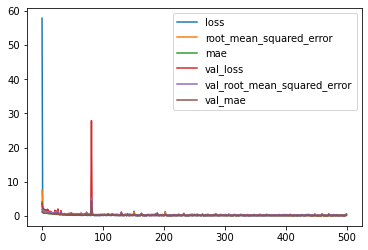

In [211]:
history=pd.DataFrame(model.history.history)
history.plot()

In [213]:
model.evaluate(x_test,y_test)

2347/2347 [==============================] - 11s 5ms/step - loss: 0.3992 - root_mean_squared_error: 0.6318 - mae: 0.3807


[0.39920032024383545, 0.6318230032920837, 0.38074731826782227]

In [214]:
testTahminleri=model.predict(x_test)
len(testTahminleri)

75082

In [215]:
tahmin=pd.DataFrame(y_test.values)
testTahminleri= pd.Series(testTahminleri.reshape(75082,))
tahminDf=pd.concat([tahmin,testTahminleri],axis=1)
tahminDf.columns=["Gerçek Değer","Test Sonucu"]

In [216]:
tahminDf.head(20)

,Gerçek Değer,Test Sonucu
0,30.59,31.852718
1,15.06,15.528532
2,3.52,3.343281
3,9.42,9.500442
4,27.98,28.620113
5,26.99,27.196718
6,18.79,18.125530
7,22.17,23.386173
8,20.81,21.228161
9,22.55,22.350063


In [ ]:
# Yorum:
#Derin öğrenme ağımız test sonucunda iyi sonuçlar elde etmesine rağmen submission sonuçları iyi değil.
#bizden beklenen başka bir şey olmalı

# LinearRegression()

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [231]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [232]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [233]:
aylik_enflasyon=train.groupby("tarih").mean()

In [234]:
aylik_enflasyon=aylik_enflasyon.drop(["besin"],axis=1)

In [235]:
aylik_enflasyon=aylik_enflasyon.reset_index()

In [236]:
aylik_enflasyon["tarih"]=aylik_enflasyon.index

In [237]:
fiyat=aylik_enflasyon[["fiyat"]]
tarih=aylik_enflasyon[["tarih"]]

In [238]:
x_train,x_test,y_train,y_test=train_test_split(tarih,fiyat,test_size=0.33,random_state=0)

In [239]:
lr=LinearRegression()

In [240]:
lr.fit(x_train,y_train)

LinearRegression()

In [257]:
tahmin=lr.predict(x_test)

In [259]:
tahmin = tahmin.reshape([20])

In [261]:
tahmin=pd.Series(tahmin)

In [270]:
y_test=y_test.reset_index()

In [273]:
frames = [tahmin,y_test]
result = pd.concat(frames, axis=1)

In [274]:
result.head()

,0,index,fiyat
0,15.144015,26,13.595193
1,18.196647,35,17.745430
2,26.336997,59,28.835277
3,15.822378,28,14.351772
4,10.056296,11,10.209908


In [ ]:
#Yorum:
#Sonuçlar yakın bile değil

ConversionError: Failed to convert value(s) to axis units: datetime.date(2016, 1, 1)

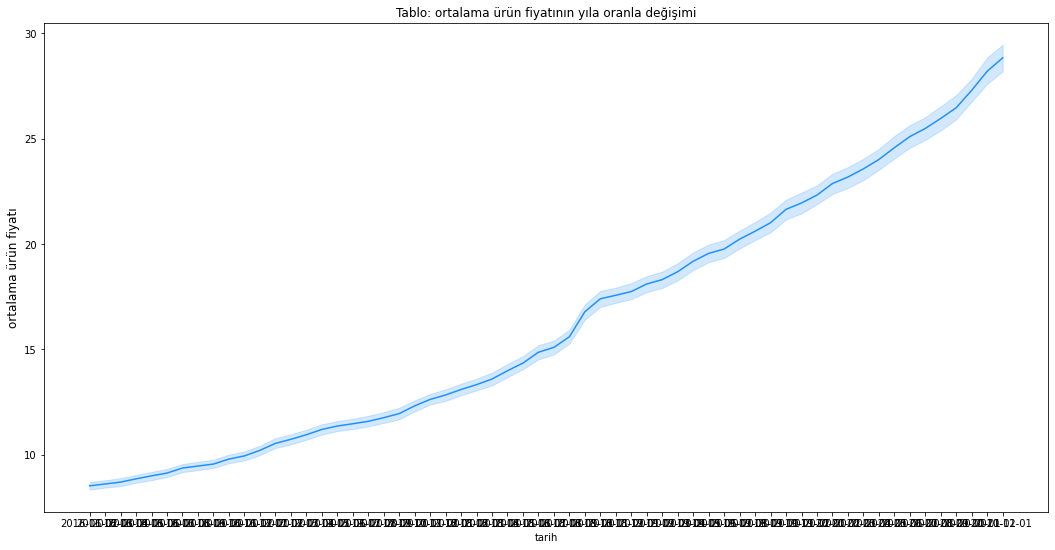

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,9))
sns.lineplot(x=train['tarih'], y=train['fiyat'].fillna(method='ffill'), color='dodgerblue')
ax.set_title('Tablo: {}'.format('ortalama ürün fiyatının yıla oranla değişimi'), fontsize=12)
ax.set_ylabel(ylabel='ortalama ürün fiyatı', fontsize=12)          
ax.set_xlim([date(2016, 1, 1), date(2020, 12, 1)])

In [ ]:
'''Ürünlerin ortalama değerleri alındığında yaklaşık olarak liner bir aatış görülmektedir.
   Ortalama bir artış değeri ülkenin yıllar içindeki artışına eşit diyebiliriz'''

# ortalama değerini alma

In [276]:
from pandas import read_csv
import datetime

In [277]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [278]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [279]:
urunler=train["urun"].unique()

In [280]:
urunler

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [288]:
toplam_enflasyon=0
for urun in urunler:
    malzeme= train[train['urun'].isin([urun])]
    aylik_enflasyon=malzeme.groupby("tarih").mean()
    aylik_enflasyon["enflasyon"]=0
    aylik_enflasyon=aylik_enflasyon.drop("besin",axis=1)
    for x in range(59):
        if x==59:
            aylik_enflasyon.iloc[x:y,2:3]=0
        else:
            y=x+1
            z=y+1
            aylik_enflasyon.iloc[x:y,1:2]=aylik_enflasyon.iloc[y:z,0:1].values/aylik_enflasyon.iloc[x:y,0:1].values
    toplam_enflasyon=toplam_enflasyon+(aylik_enflasyon["enflasyon"].sum()/59)
print(toplam_enflasyon)

80.65198421633805


In [289]:
aylik_enflasyon

,fiyat,enflasyon
tarih,,
2016-01-01,18.120833,1.010152
2016-02-01,18.304792,1.012713
2016-03-01,18.537500,1.019375
2016-04-01,18.896667,1.015721
2016-05-01,19.193750,1.015836
2016-06-01,19.497708,1.027129
2016-07-01,20.026667,1.009623
2016-08-01,20.219375,1.010221
2016-09-01,20.426042,1.022867


In [290]:
#5 yıllık ortalama enflasyon

In [291]:
ortalama_enflasyon=toplam_enflasyon/79
print(ortalama_enflasyon)

1.0209111926118741


In [292]:
tarih2020=train.iloc[223728:,:]

In [294]:
ocak2021=tarih2020["fiyat"]*ortalama_enflasyon
subat2021=ocak2021*ortalama_enflasyon
mart2021=subat2021*ortalama_enflasyon
nisan2021=mart2021*ortalama_enflasyon
mayıs2021=nisan2021*ortalama_enflasyon
haziran2021=mayıs2021*ortalama_enflasyon
temmuz2021=haziran2021*ortalama_enflasyon
agustos2021=temmuz2021*ortalama_enflasyon
eylul2021=agustos2021*ortalama_enflasyon
ekim2021=eylul2021*ortalama_enflasyon
kasim2021=ekim2021*ortalama_enflasyon
aralik2021=kasim2021*ortalama_enflasyon

In [295]:
tarih2021=pd.concat([ocak2021,subat2021,mart2021,nisan2021,mayıs2021,haziran2021,temmuz2021,agustos2021,eylul2021,ekim2021,kasim2021,aralik2021]).reset_index()

In [296]:
tarih2021.head()

,index,fiyat
0,223728,118.241934
1,223729,38.427097
2,223730,38.968180
3,223731,23.348239
4,223732,41.632758


# Zaman Serisi Denemesi

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")

In [319]:
veri=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [320]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
veri.columns=sutunisimler

In [321]:
urunler=veri["urun"].unique()

In [322]:
for urun in urunler:
    malzeme= veri[veri['urun'].isin([urun])]
    aylik_enflasyon=malzeme.groupby("tarih").mean()
    aylik_enflasyon["enflasyon"]=0
    aylik_enflasyon=aylik_enflasyon.drop("besin",axis=1)
    for x in range(59):
        if x==59:
            aylik_enflasyon.iloc[x:y,2:3]=0
        else:
            y=x+1
            z=y+1
            aylik_enflasyon.iloc[x:y,1:2]=aylik_enflasyon.iloc[y:z,0:1].values/aylik_enflasyon.iloc[x:y,0:1].values


In [323]:
enflasyon=aylik_enflasyon.drop("fiyat",axis=1)
enflasyon=enflasyon.iloc[:-1,:]
enflasyon=enflasyon.reset_index()
enflasyon["tarih"]=pd.to_datetime(enflasyon["tarih"])
enflasyon=enflasyon.set_index("tarih")

In [324]:
enflasyon

,enflasyon
tarih,
2016-01-01,1.010152
2016-02-01,1.012713
2016-03-01,1.019375
2016-04-01,1.015721
2016-05-01,1.015836
2016-06-01,1.027129
2016-07-01,1.009623
2016-08-01,1.010221
2016-09-01,1.022867


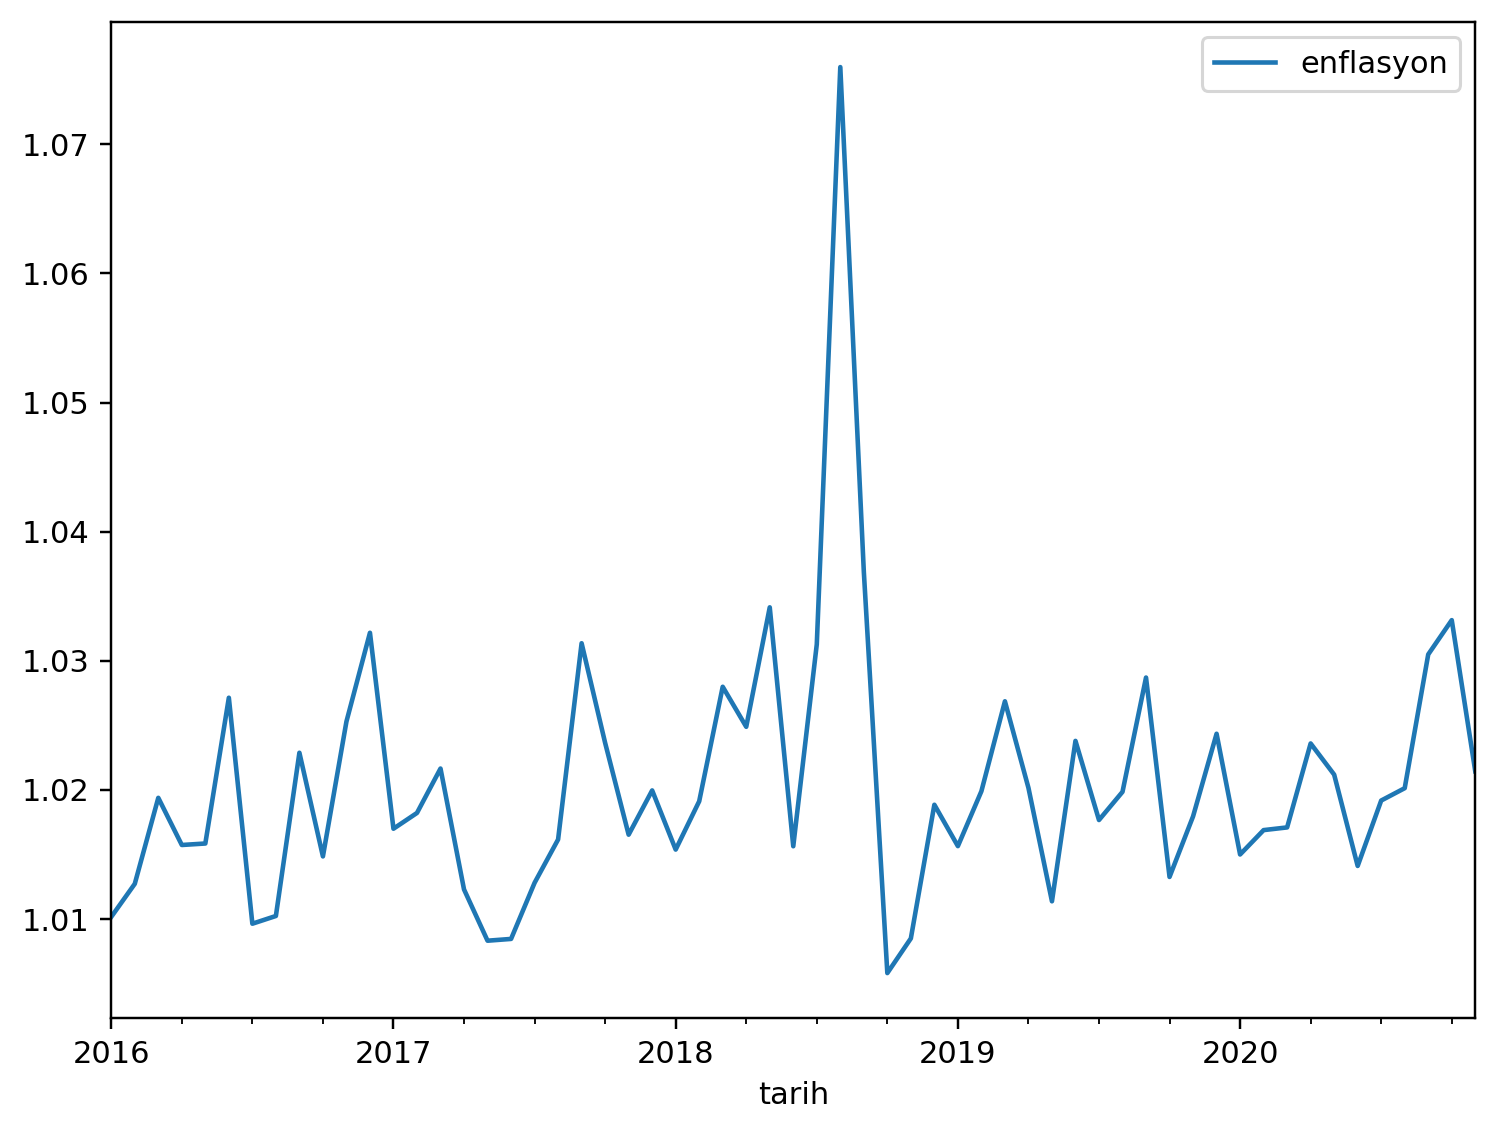

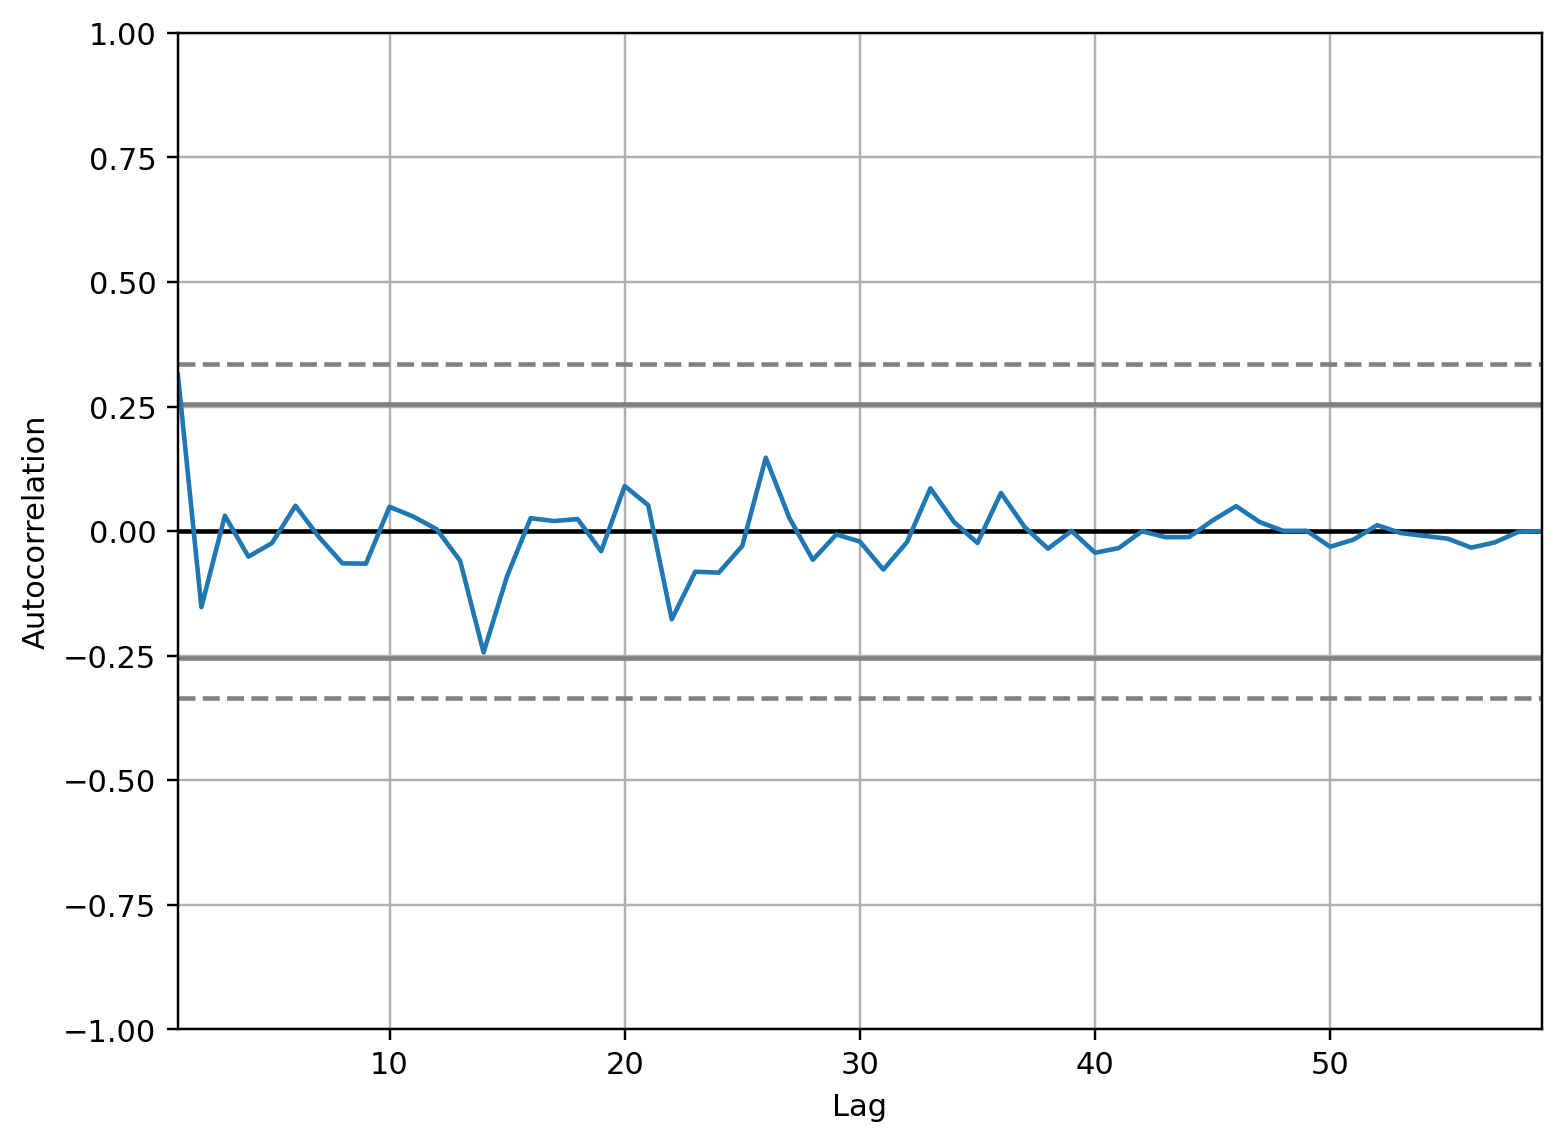

            enflasyon
tarih                
2016-01-01   1.010152
2016-02-01   1.012713
2016-03-01   1.019375
2016-04-01   1.015721
2016-05-01   1.015836


In [325]:
# 5 yıllık enflasyon tablosu
enflasyon.plot(figsize = (8,6))

fig = pyplot.figure(figsize = (8,6))
autocorrelation_plot(enflasyon)
pyplot.show()

print(enflasyon.head(5))

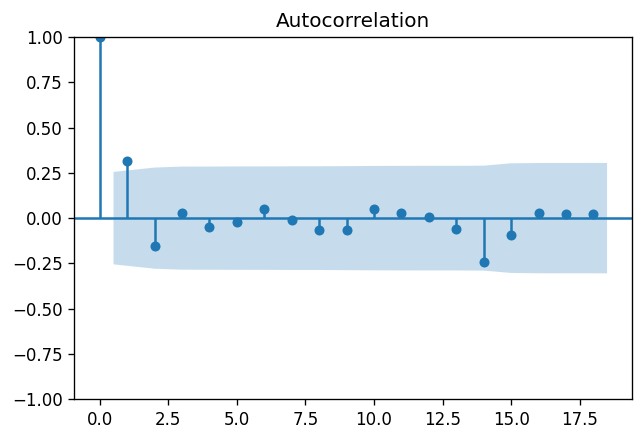

In [326]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

plot_acf(enflasyon)
pyplot.show()

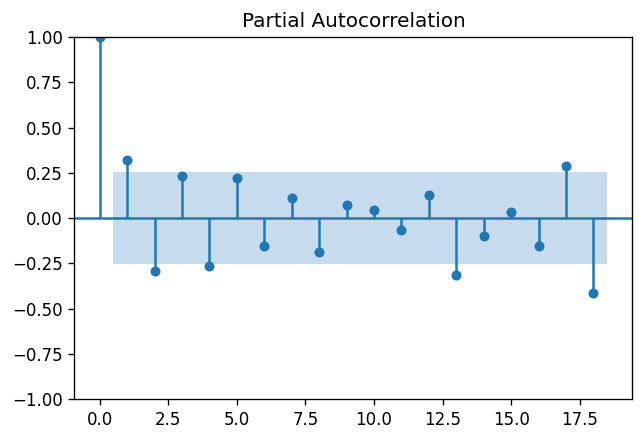

In [327]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(enflasyon)
pyplot.show()

In [328]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(); print(f'ADF Statistic: {result[0]}')
    print();  print(f'n_lags: {result[1]}')
    print();  print(f'p-value: {result[1]}')

    print(); print('Critial Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')   

adf_test(enflasyon["enflasyon"])


ADF Statistic: -4.04754915715134

n_lags: 0.0011810066863737901

p-value: 0.0011810066863737901

Critial Values:
   1%, -3.5552728880540942
   5%, -2.9157312396694217
   10%, -2.5956695041322315


In [329]:
train=enflasyon[:len(enflasyon)-12]
test=enflasyon[len(enflasyon)-12:]

                               SARIMAX Results                                
Dep. Variable:              enflasyon   No. Observations:                   59
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 196.824
Date:                Fri, 08 Apr 2022   AIC                           -383.649
Time:                        16:29:31   BIC                           -373.261
Sample:                    01-01-2016   HQIC                          -379.594
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0204      0.002    498.623      0.000       1.016       1.024
ar.L1         -0.0804      0.844     -0.095      0.924      -1.736       1.575
ma.L1          0.6756      0.861      0.785      0.4

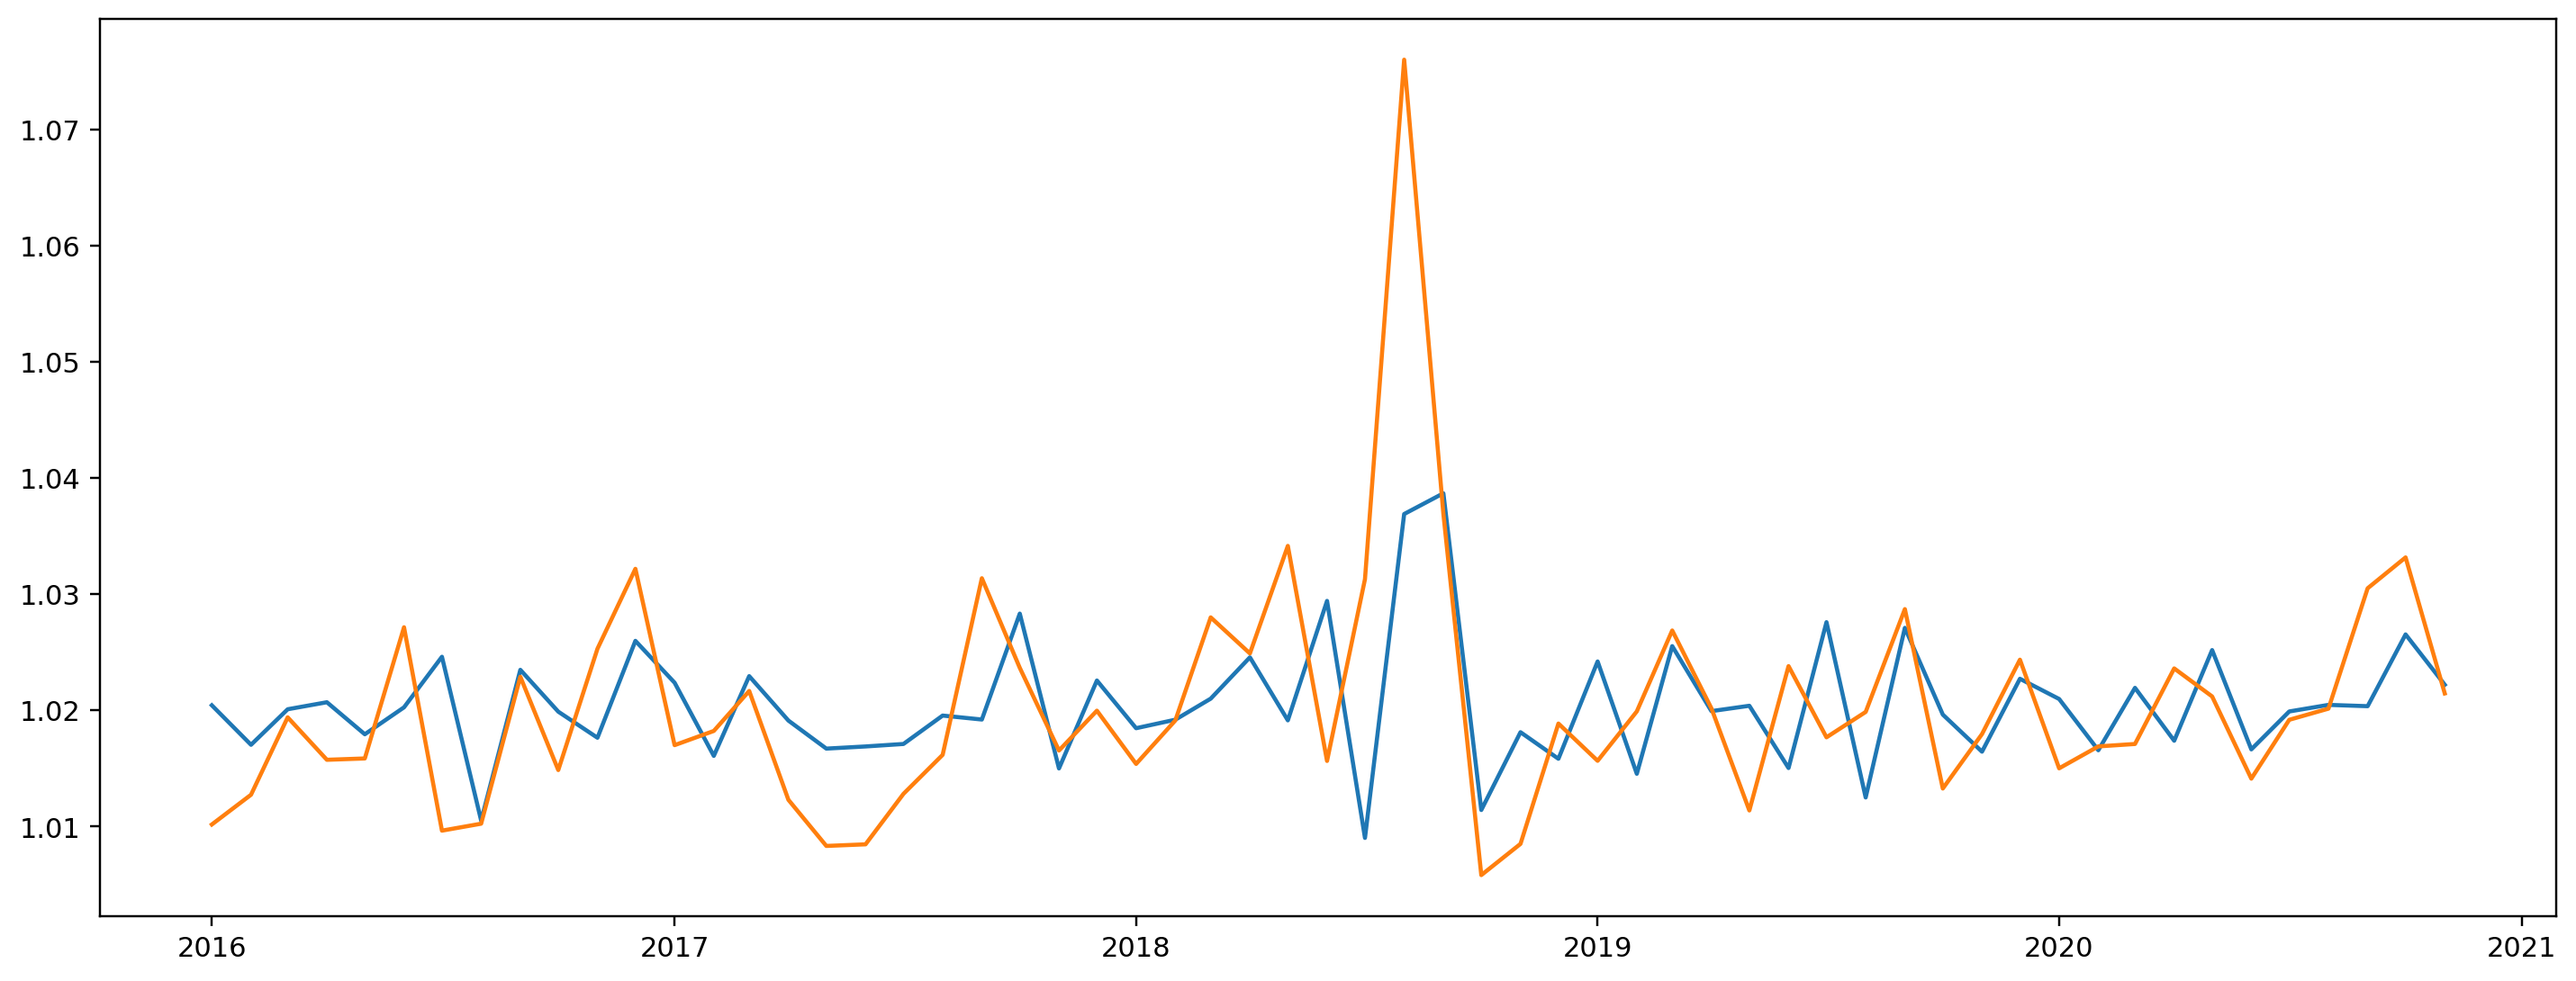

In [330]:
from statsmodels.tsa.arima.model import ARIMA

plt.rcParams.update({'figure.figsize':(16,6), 'figure.dpi':220})

# Model
model = ARIMA(enflasyon["enflasyon"], order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())


# Enflasyon vs Tahmin
predict=model_fit.predict()
plt.plot(predict)
plt.plot(enflasyon["enflasyon"])
plt.show()

<AxesSubplot:xlabel='tarih'>

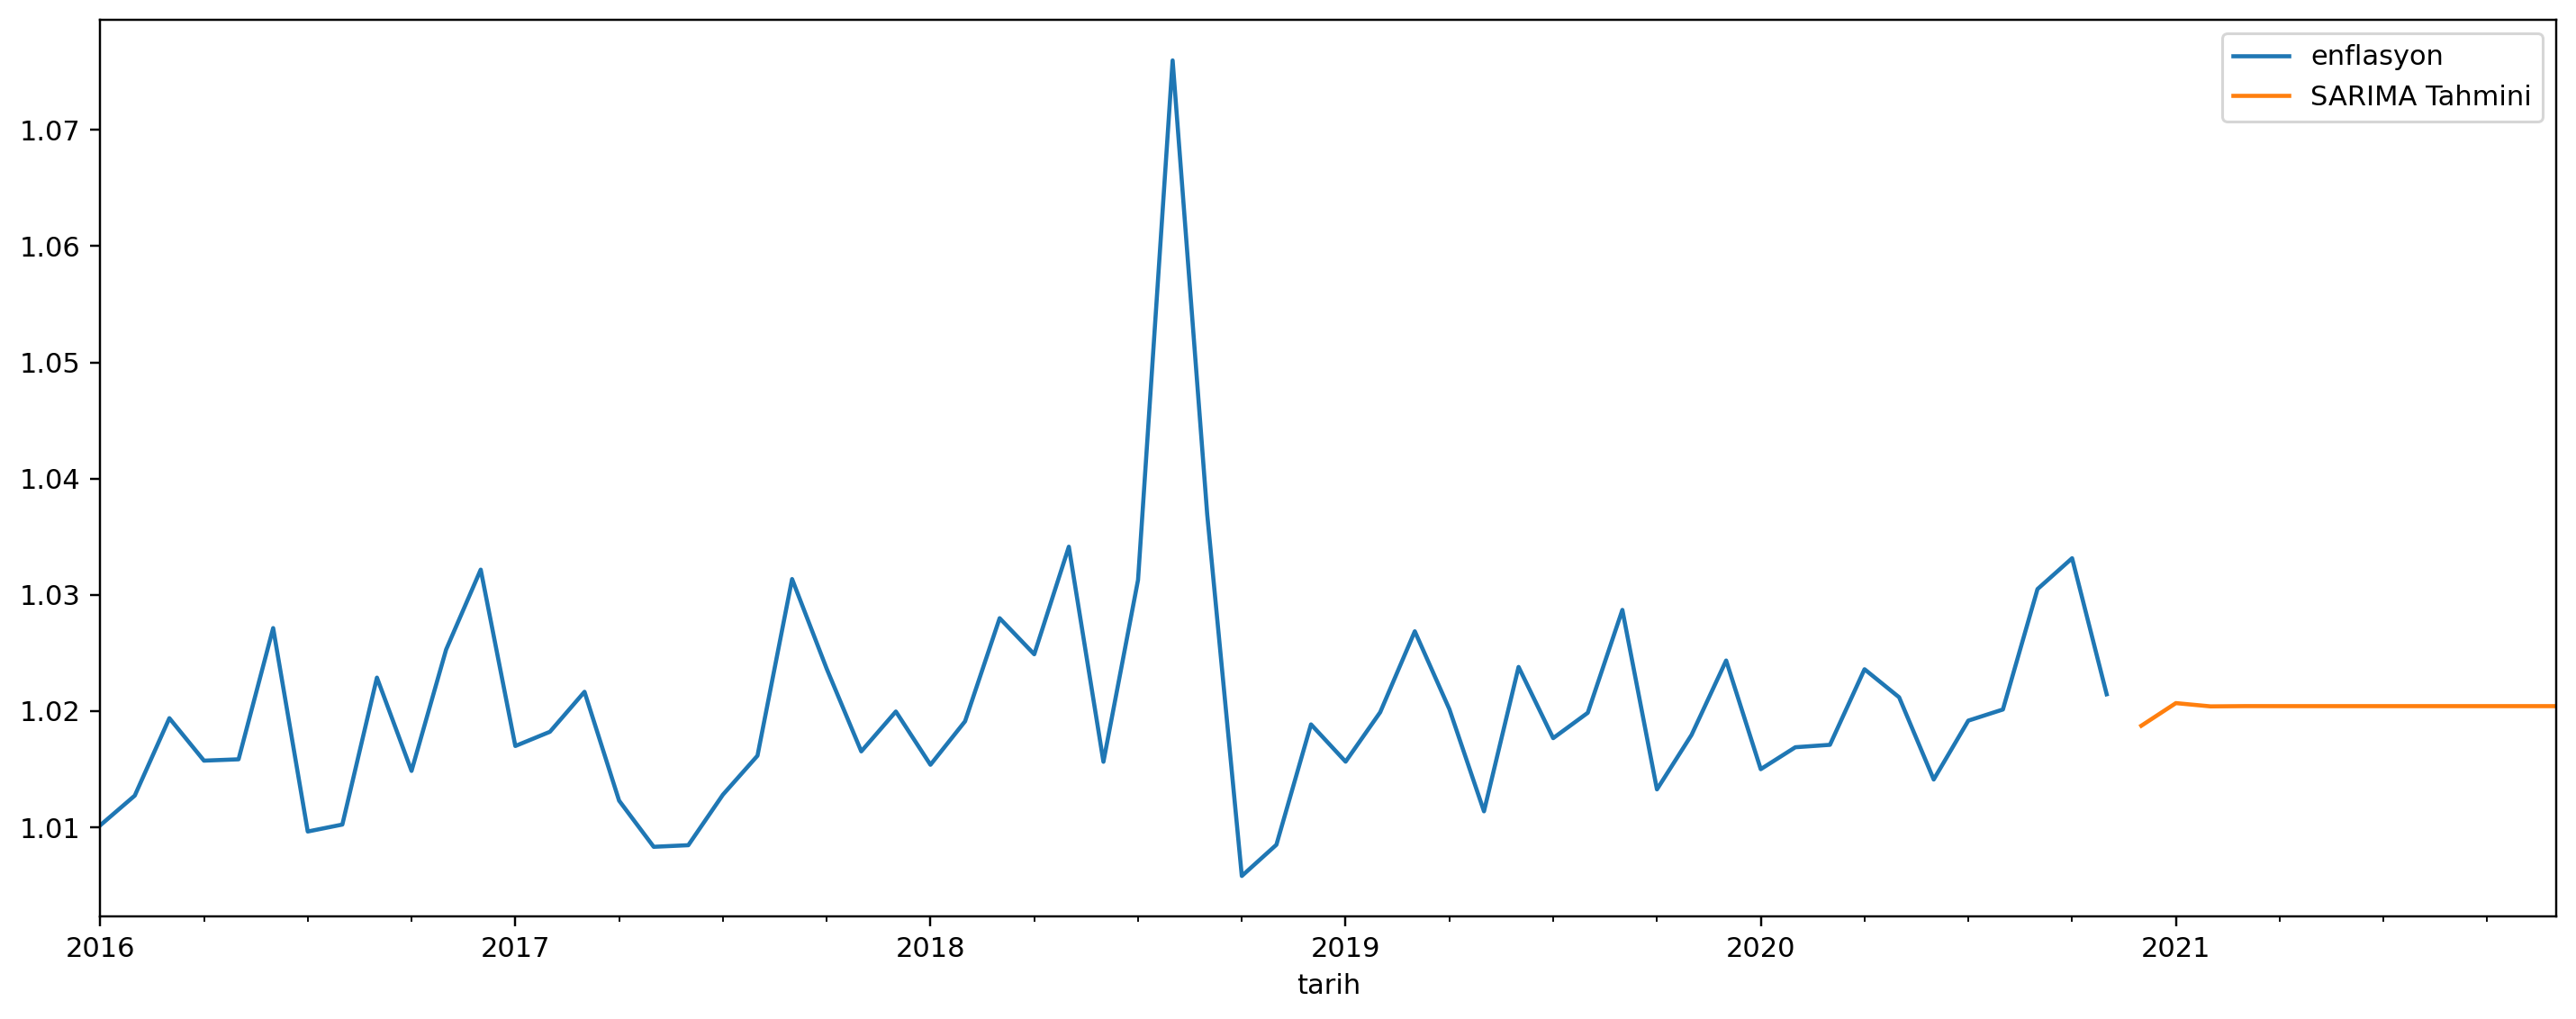

In [331]:
sarima_pred=model_fit.predict(start=len(enflasyon),end=len(enflasyon)+12, typ="levels").rename("SARIMA Tahmini")
enflasyon["enflasyon"].plot(legend=True)
sarima_pred.plot(legend=True)

In [332]:
sarima_pred

2020-12-01    1.018723
2021-01-01    1.020673
2021-02-01    1.020392
2021-03-01    1.020414
2021-04-01    1.020412
2021-05-01    1.020413
2021-06-01    1.020412
2021-07-01    1.020412
2021-08-01    1.020412
2021-09-01    1.020412
2021-10-01    1.020412
2021-11-01    1.020412
2021-12-01    1.020412
Freq: MS, Name: SARIMA Tahmini, dtype: float64

In [333]:
fcast = model_fit.get_forecast(12)
print('Forecast:')
print(fcast.predicted_mean)
print('Confidence intervals:')
print(fcast.conf_int())

Forecast:
2020-12-01    1.018723
2021-01-01    1.020673
2021-02-01    1.020392
2021-03-01    1.020414
2021-04-01    1.020412
2021-05-01    1.020413
2021-06-01    1.020412
2021-07-01    1.020412
2021-08-01    1.020412
2021-09-01    1.020412
2021-10-01    1.020412
2021-11-01    1.020412
Freq: MS, Name: predicted_mean, dtype: float64
Confidence intervals:
            lower enflasyon  upper enflasyon
2020-12-01         1.002005         1.035442
2021-01-01         1.001217         1.040128
2021-02-01         1.000609         1.040174
2021-03-01         1.000629         1.040199
2021-04-01         1.000628         1.040197
2021-05-01         1.000628         1.040197
2021-06-01         1.000628         1.040197
2021-07-01         1.000628         1.040197
2021-08-01         1.000628         1.040197
2021-09-01         1.000628         1.040197
2021-10-01         1.000628         1.040197
2021-11-01         1.000628         1.040197


In [337]:
tarih2020=veri.iloc[223728:,:]

In [338]:
''' Derin öğrenmeden farklı olarak burada sadece 2021 yılı içinde olabilecek değerleri değil 
    ayrıya en yüksek ve en düşük değerleri de buluyoruz
    Sonuç olarak yıl içinde olabilecek en yüksek enflasyon değerini alıyoruz'''

' Derin öğrenmeden farklı olarak burada sadece 2021 yılı içinde olabilecek değerleri değil \n    ayrıya en yüksek ve en düşük değerleri de buluyoruz\n    Sonuç olarak yıl içinde olabilecek en yüksek enflasyon değerini alıyoruz'

In [339]:
ocak2021=tarih2020["fiyat"]*1.035442
subat2021=ocak2021*1.040128
mart2021=subat2021*1.040174
nisan2021=mart2021*1.040199
mayıs2021=nisan2021*1.040197
haziran2021=mayıs2021*1.040197
temmuz2021=haziran2021*1.040197
agustos2021=temmuz2021*1.040197
eylul2021=agustos2021*1.040197
ekim2021=eylul2021*1.040197
kasim2021=ekim2021*1.040197
aralik2021=kasim2021*1.040197

In [340]:
tarih2021=pd.concat([ocak2021,subat2021,mart2021,nisan2021,mayıs2021,haziran2021,temmuz2021,agustos2021,eylul2021,ekim2021,kasim2021,aralik2021]).reset_index()

In [341]:
tarih2021.head()

,index,fiyat
0,223728,119.924892
1,223729,38.974037
2,223730,39.522821
3,223731,23.680559
4,223732,42.225325


In [342]:
sutunisimler=["id","ürün fiyatı"]
tarih2021.columns=sutunisimler

In [343]:
tarih2021["id"]=tarih2021.index

In [344]:
tarih2021.head()

,id,ürün fiyatı
0,0,119.924892
1,1,38.974037
2,2,39.522821
3,3,23.680559
4,4,42.225325


In [52]:
tarih2021.to_csv("veriler\datathon\sonuclar\\sonuc.csv",index=False)